In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression/normalized_merged_dataset.csv
/kaggle/input/depression/ML_Conditions DIP.xlsx


In [8]:
!pip install dtreeviz

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


In [9]:
# Libraries and modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, RFECV, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from dtreeviz import dtreeviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, roc_curve,
                             matthews_corrcoef, precision_recall_curve, auc)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, matthews_corrcoef, auc, precision_recall_curve, roc_curve, precision_score, recall_score

In [10]:
# Load data
data= pd.read_csv("/kaggle/input/depression/normalized_merged_dataset.csv",index_col=0)
data

,28067,28084,28101,28117,4320,4412200,4415140,4416160,4416213,4417130,...,GTEX-XMD1-0011-R1A-SM-4AT4C,GTEX-Y8DK-0011-R1A-SM-4RGLO,GTEX-YFC4-0011-R1a-SM-4V6EH,GTEX-YJ89-0011-R1a-SM-4RGLS,GTEX-ZAB4-0011-R1a-SM-4RGNO,GTEX-ZDXO-0011-R1a-SM-4WKF4,GTEX-ZE7O-0011-R1a-SM-57WDM,GTEX-ZF28-0011-R1a-SM-4WWD1,GTEX-ZUA1-0011-R1a-SM-4YCE2,GTEX-ZVZQ-0011-R1a-SM-57WBU
ENSG00000000003,0.172079,0.644578,0.167465,0.929358,0.647338,0.206941,0.435472,0.477645,0.154437,0.999468,...,12.267823,5.334519,11.168994,8.791840,15.818875,17.584026,4.582024,4.979012,17.947384,8.245732
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.065868,0.124784,0.091455,0.029257,0.237878,0.208624,0.104732,0.037863,0.107684,0.196913
ENSG00000000419,11.873424,21.859589,9.768809,14.504624,11.490254,7.311927,10.752820,13.704747,5.714173,12.781076,...,9.847192,12.416014,15.570286,8.075035,18.039068,12.264113,4.372560,5.830934,15.506540,7.458080
ENSG00000000457,31.633785,39.571461,33.604704,36.012625,38.786350,32.386320,30.818052,37.182852,21.621197,35.405397,...,3.935584,3.135200,5.990330,4.052146,5.788360,6.452443,2.186280,1.647050,7.609691,3.839804
ENSG00000000460,13.135334,15.217637,16.383689,13.210161,18.179416,10.795440,15.107545,16.938038,10.077022,16.960669,...,3.392177,0.826694,1.440423,1.243438,3.508698,1.564680,0.432019,0.473290,2.081897,0.836880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000272540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.082334,0.202774,0.171479,0.117029,0.158585,0.223526,0.104732,0.037863,0.233316,0.172299
ENSG00000272541,0.057360,0.000000,0.139554,0.066383,0.026972,0.034490,0.100494,0.073484,0.077219,0.060574,...,1.053880,4.180266,1.017442,0.614405,1.863376,1.773304,1.570980,1.665981,1.184527,3.716733
ENSG00000272542,0.516236,2.185959,1.116435,0.896167,1.429539,0.724295,0.602962,1.249226,0.386093,0.938894,...,0.049401,0.124784,0.102887,0.058515,0.138762,0.029803,0.052366,0.075726,0.161526,0.000000
ENSG00000272543,0.057360,0.084075,0.027911,0.033191,0.080917,0.068980,0.066996,0.036742,0.115828,0.090861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024614


In [11]:
# transpose the data
data = data.transpose()
data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000272525,ENSG00000272529,ENSG00000272533,ENSG00000272536,ENSG00000272537,ENSG00000272540,ENSG00000272541,ENSG00000272542,ENSG00000272543,ENSG00000272545
28067,0.172079,0.000000,11.873424,31.633785,13.135334,537.086024,3.986488,15.343676,53.487768,63.583047,...,0.458876,4.129887,1.577387,0.0,0.000000,0.000000,0.057360,0.516236,0.057360,0.315477
28084,0.644578,0.000000,21.859589,39.571461,15.217637,371.669065,14.124658,13.816381,41.729395,88.363185,...,0.756678,10.341267,2.494235,0.0,0.000000,0.000000,0.000000,2.185959,0.084075,0.112100
28101,0.167465,0.000000,9.768809,33.604704,16.383689,706.982692,3.070197,20.430767,46.443711,70.977378,...,0.055822,2.818999,1.953762,0.0,0.000000,0.000000,0.139554,1.116435,0.027911,0.307020
28117,0.929358,0.000000,14.504624,36.012625,13.210161,562.726309,2.754883,11.616976,26.254365,84.239670,...,0.398296,7.235716,2.124247,0.0,0.000000,0.000000,0.066383,0.896167,0.033191,0.099574
4320,0.647338,0.000000,11.490254,38.786350,18.179416,477.331037,6.473382,18.637947,37.033142,77.545727,...,0.458531,8.469342,1.375594,0.0,0.000000,0.000000,0.026972,1.429539,0.080917,0.053945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZDXO-0011-R1a-SM-4WKF4,17.584026,0.208624,12.264113,6.452443,1.564680,6.273623,13.083708,13.888400,35.153150,21.071028,...,0.789791,0.119214,0.000000,0.0,0.029803,0.223526,1.773304,0.029803,0.000000,0.000000
GTEX-ZE7O-0011-R1a-SM-57WDM,4.582024,0.104732,4.372560,2.186280,0.432019,6.022088,6.558840,4.464200,10.957582,11.415785,...,0.288013,0.117823,0.000000,0.0,0.000000,0.104732,1.570980,0.052366,0.000000,0.000000
GTEX-ZF28-0011-R1a-SM-4WWD1,4.979012,0.037863,5.830934,1.647050,0.473290,7.534779,9.181828,4.562517,12.173022,10.298793,...,0.265042,0.265042,0.000000,0.0,0.000000,0.037863,1.665981,0.075726,0.000000,0.000000
GTEX-ZUA1-0011-R1a-SM-4YCE2,17.947384,0.107684,15.506540,7.609691,2.081897,7.519954,16.027014,18.431963,52.280729,23.672599,...,0.915317,0.358948,0.000000,0.0,0.125632,0.233316,1.184527,0.161526,0.000000,0.000000


In [12]:
data.reset_index(inplace=True)
data = data.rename(columns={'index' : 'samples'})
data

,samples,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000272525,ENSG00000272529,ENSG00000272533,ENSG00000272536,ENSG00000272537,ENSG00000272540,ENSG00000272541,ENSG00000272542,ENSG00000272543,ENSG00000272545
0,28067,0.172079,0.000000,11.873424,31.633785,13.135334,537.086024,3.986488,15.343676,53.487768,...,0.458876,4.129887,1.577387,0.0,0.000000,0.000000,0.057360,0.516236,0.057360,0.315477
1,28084,0.644578,0.000000,21.859589,39.571461,15.217637,371.669065,14.124658,13.816381,41.729395,...,0.756678,10.341267,2.494235,0.0,0.000000,0.000000,0.000000,2.185959,0.084075,0.112100
2,28101,0.167465,0.000000,9.768809,33.604704,16.383689,706.982692,3.070197,20.430767,46.443711,...,0.055822,2.818999,1.953762,0.0,0.000000,0.000000,0.139554,1.116435,0.027911,0.307020
3,28117,0.929358,0.000000,14.504624,36.012625,13.210161,562.726309,2.754883,11.616976,26.254365,...,0.398296,7.235716,2.124247,0.0,0.000000,0.000000,0.066383,0.896167,0.033191,0.099574
4,4320,0.647338,0.000000,11.490254,38.786350,18.179416,477.331037,6.473382,18.637947,37.033142,...,0.458531,8.469342,1.375594,0.0,0.000000,0.000000,0.026972,1.429539,0.080917,0.053945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,GTEX-ZDXO-0011-R1a-SM-4WKF4,17.584026,0.208624,12.264113,6.452443,1.564680,6.273623,13.083708,13.888400,35.153150,...,0.789791,0.119214,0.000000,0.0,0.029803,0.223526,1.773304,0.029803,0.000000,0.000000
525,GTEX-ZE7O-0011-R1a-SM-57WDM,4.582024,0.104732,4.372560,2.186280,0.432019,6.022088,6.558840,4.464200,10.957582,...,0.288013,0.117823,0.000000,0.0,0.000000,0.104732,1.570980,0.052366,0.000000,0.000000
526,GTEX-ZF28-0011-R1a-SM-4WWD1,4.979012,0.037863,5.830934,1.647050,0.473290,7.534779,9.181828,4.562517,12.173022,...,0.265042,0.265042,0.000000,0.0,0.000000,0.037863,1.665981,0.075726,0.000000,0.000000
527,GTEX-ZUA1-0011-R1a-SM-4YCE2,17.947384,0.107684,15.506540,7.609691,2.081897,7.519954,16.027014,18.431963,52.280729,...,0.915317,0.358948,0.000000,0.0,0.125632,0.233316,1.184527,0.161526,0.000000,0.000000


In [13]:
#load label data
labels= pd.read_excel("/kaggle/input/depression/ML_Conditions DIP.xlsx" )
labels

,Title,diagnosis
0,28067,MDD
1,28084,MDD
2,28101,MDD
3,28117,MDD
4,4320,Healthy_control
...,...,...
524,GTEX-ZDXO-0011-R1a-SM-4WKF4,Healthy_control
525,GTEX-ZE7O-0011-R1a-SM-57WDM,Healthy_control
526,GTEX-ZF28-0011-R1a-SM-4WWD1,Healthy_control
527,GTEX-ZUA1-0011-R1a-SM-4YCE2,Healthy_control


In [14]:
# Explore shapes of data and labels
print(f"Shape of data {data.shape}")
print(f"Shape of data {labels.shape}")

Shape of data (529, 50476)
Shape of data (529, 2)


In [15]:
#Check data types
data.dtypes.value_counts()

float64    50475
object         1
Name: count, dtype: int64

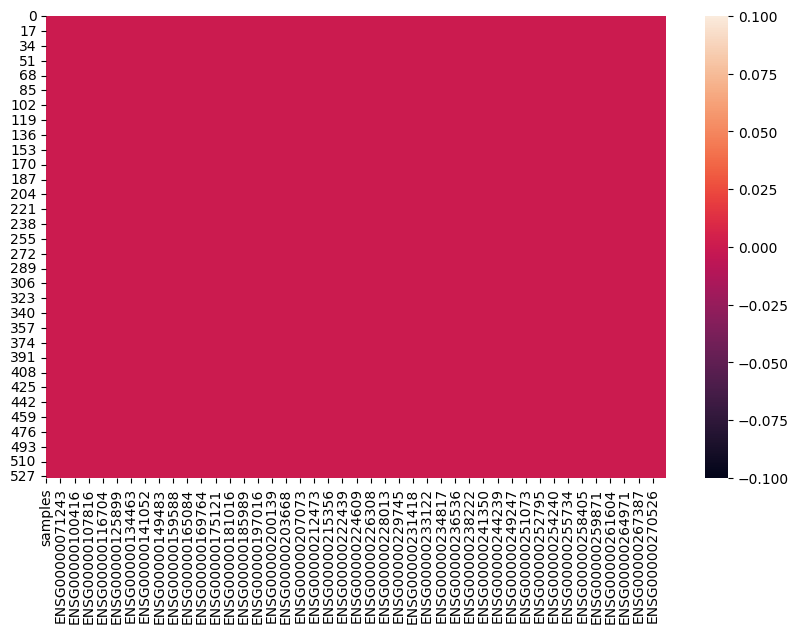

In [16]:
# a heat map to visualize the missing values in the data
plt.figure(figsize= (10,6))
sns.heatmap(data.isnull())
plt.show()

In [17]:
# confirm there is no Null
data.isnull().any().sum()

0

In [18]:
import numpy as np
import pandas as pd

# Replace outliers with the upper and lower IQR bounds
def outliers(data):
    for col in data.select_dtypes(include=np.number).columns:  # Apply only to numerical columns
        IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
        lower_bound = data[col].quantile(0.25) - 1.5 * IQR
        upper_bound = data[col].quantile(0.75) + 1.5 * IQR
        data[col] = np.where(data[col] >= upper_bound, upper_bound, data[col])
        data[col] = np.where(data[col] <= lower_bound, lower_bound, data[col])
    return data

# Apply it to data
data = outliers(data)
data.shape


(529, 50476)

In [19]:
# count the values of the labels
labels['diagnosis'].value_counts()

diagnosis
MDD                302
Healthy_control    227
Name: count, dtype: int64

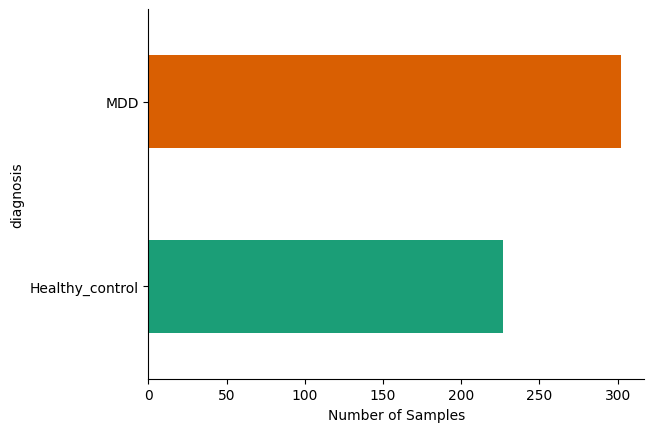

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'labels' is your DataFrame
labels.groupby('diagnosis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Set the X-axis label
plt.xlabel('Number of Samples')

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


In [21]:
# split x as features and y as labels
x= data
y= labels.iloc[:,1]

In [22]:
# split data 80% training and 20% testing
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, stratify= y, random_state= 0)

In [23]:
# classifiers with default parameters
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(kernel="linear", probability= True),
    "RBF SVM": SVC(probability= True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

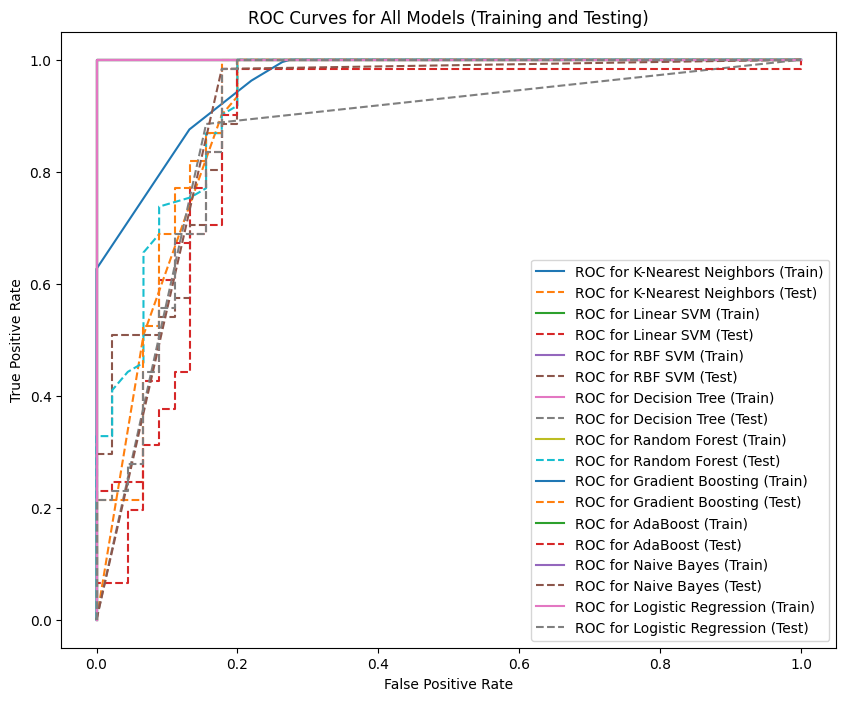

,Accuracy_train,Accuracy_test,F1_train,F1_test,AUROC_train,AUROC_test,AUPRC_train,AUPRC_test,MCC_train,MCC_test
K-Nearest Neighbors,0.884161,0.877358,0.878668,0.872348,0.959122,0.915665,0.970521,0.922241,0.767692,0.748889
Linear SVM,1.0,0.90566,1.0,0.901414,1.0,0.911475,1.0,0.906773,1.0,0.809129
RBF SVM,0.881797,0.915094,0.87339,0.910093,1.0,0.918397,1.0,0.926489,0.775021,0.834951
Decision Tree,1.0,0.867925,1.0,0.864845,1.0,0.864845,1.0,0.918265,1.0,0.72969
Random Forest,1.0,0.90566,1.0,0.900563,1.0,0.93133,1.0,0.93748,1.0,0.812538
Gradient Boosting,1.0,0.896226,1.0,0.891987,1.0,0.918033,1.0,0.909664,1.0,0.788265
AdaBoost,1.0,0.867925,1.0,0.864003,1.0,0.87031,1.0,0.846865,1.0,0.728655
Naive Bayes,1.0,0.915094,1.0,0.910899,1.0,0.902914,1.0,0.937697,1.0,0.830554
Logistic Regression,1.0,0.915094,1.0,0.910899,1.0,0.90929,1.0,0.904542,1.0,0.830554


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, roc_curve,
                             matthews_corrcoef, precision_recall_curve, auc)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Assuming classifiers is defined and y_train, y_test, x_train, and x_test are loaded

# Convert categorical columns to numerical using one-hot encoding
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Align the training and testing data (to ensure they have the same columns after one-hot encoding)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the metrics DataFrame
df = pd.DataFrame(index=classifiers.keys(), columns=['Accuracy_train', 'Accuracy_test',
                                                     'F1_train', 'F1_test',
                                                     'AUROC_train', 'AUROC_test',
                                                     'AUPRC_train', 'AUPRC_test',
                                                     'MCC_train', 'MCC_test'])

# Initialize figure for combined ROC-AUC curves
fig_roc, ax_roc = plt.subplots(figsize=(10, 8))

# Loop over the classifier dictionary
for key in classifiers.keys():
    # Create a pipeline that standardizes the data and removes constant features before fitting the classifier
    pip = Pipeline([
        ('standardization', StandardScaler()),
        ('feature_selection', VarianceThreshold(threshold=0.0)),
        ('classification', classifiers[key])
    ])

    # Check for mismatch in number of samples
    if x_train.shape[0] != y_train_encoded.shape[0]:
        print(f"Mismatch in number of samples for {key}: x_train - {x_train.shape[0]}, y_train - {y_train_encoded.shape[0]}")
        continue  # Skip to the next classifier

    # Fit the model
    model = pip.fit(x_train, y_train_encoded)

    # Predict the label on the training data
    pred_train_encoded = model.predict(x_train)
    pred_prob_train = model.predict_proba(x_train)[:, 1]  # Extract the probability for class 1

    # Training metrics
    acc_score_train = accuracy_score(y_train_encoded, pred_train_encoded)
    f1_train = f1_score(y_train_encoded, pred_train_encoded, average='macro')
    auroc_train = roc_auc_score(y_train_encoded, pred_prob_train)  # Use the probability for class 1
    mcc_train = matthews_corrcoef(y_train_encoded, pred_train_encoded)
    precision1, recall1, _ = precision_recall_curve(y_train_encoded, pred_prob_train)  # Use the probability for class 1
    auprc_train = auc(recall1, precision1)

    # Predict the label on the testing data
    pred_test_encoded = model.predict(x_test)
    pred_prob_test = model.predict_proba(x_test)[:, 1]  # Extract the probability for class 1

    # Testing metrics
    acc_score_test = accuracy_score(y_test_encoded, pred_test_encoded)
    f1_test = f1_score(y_test_encoded, pred_test_encoded, average='macro')
    auroc_test = roc_auc_score(y_test_encoded, pred_prob_test)  # Use the probability for class 1
    mcc_test = matthews_corrcoef(y_test_encoded, pred_test_encoded)
    precision2, recall2, _ = precision_recall_curve(y_test_encoded, pred_prob_test)  # Use the probability for class 1
    auprc_test = auc(recall2, precision2)

    # Fill the DataFrame with metrics
    df.loc[key] = [acc_score_train, acc_score_test,
                   f1_train, f1_test,
                   auroc_train, auroc_test,
                   auprc_train, auprc_test,
                   mcc_train, mcc_test]

    # Display ROC curves for training and testing predictions on the same plot
    fp1, tp1, _ = roc_curve(y_train_encoded, pred_prob_train)
    fp2, tp2, _ = roc_curve(y_test_encoded, pred_prob_test)

    ax_roc.plot(fp1, tp1, label=f"ROC for {key} (Train)")
    ax_roc.plot(fp2, tp2, label=f"ROC for {key} (Test)", linestyle='--')

# Set plot titles and labels for ROC curves
ax_roc.set_title("ROC Curves for All Models (Training and Testing)")
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.legend()

plt.show()

# Display the metrics DataFrame
df


,Accuracy_train,Accuracy_test,F1_train,F1_test,AUROC_train,AUROC_test,AUPRC_train,AUPRC_test,MCC_train,MCC_test
K-Nearest Neighbors,0.884161,0.877358,0.904483,0.897638,0.959122,0.915665,0.970521,0.922241,0.767692,0.748889
Linear SVM,1.0,0.90566,1.0,0.921875,1.0,0.911475,1.0,0.906773,1.0,0.809129
RBF SVM,0.881797,0.915094,0.906015,0.931298,1.0,0.918397,1.0,0.926489,0.775021,0.834951
Decision Tree,1.0,0.877358,1.0,0.892562,1.0,0.875956,1.0,0.925642,1.0,0.749867
Random Forest,1.0,0.90566,1.0,0.923077,1.0,0.923133,1.0,0.923999,1.0,0.812538
Gradient Boosting,1.0,0.896226,1.0,0.913386,1.0,0.924954,1.0,0.918017,1.0,0.788265
AdaBoost,1.0,0.867925,1.0,0.887097,1.0,0.87031,1.0,0.846865,1.0,0.728655
Naive Bayes,1.0,0.915094,1.0,0.930233,1.0,0.902914,1.0,0.937697,1.0,0.830554
Logistic Regression,1.0,0.915094,1.0,0.930233,1.0,0.90929,1.0,0.904542,1.0,0.830554


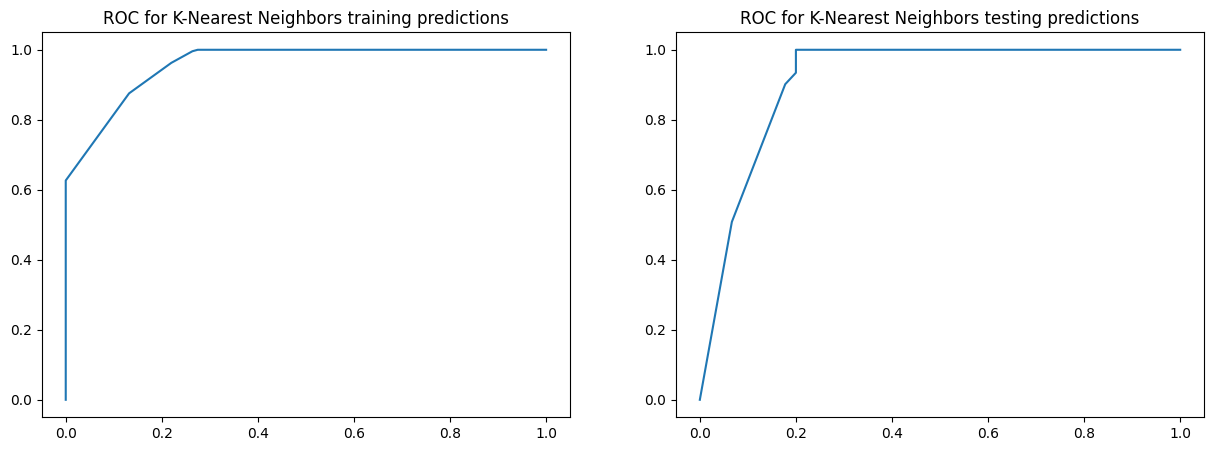

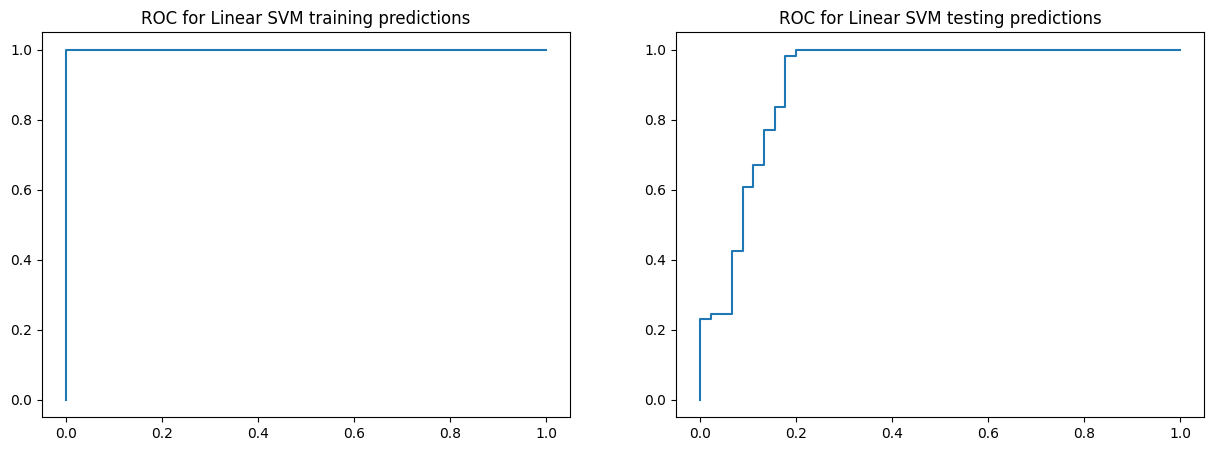

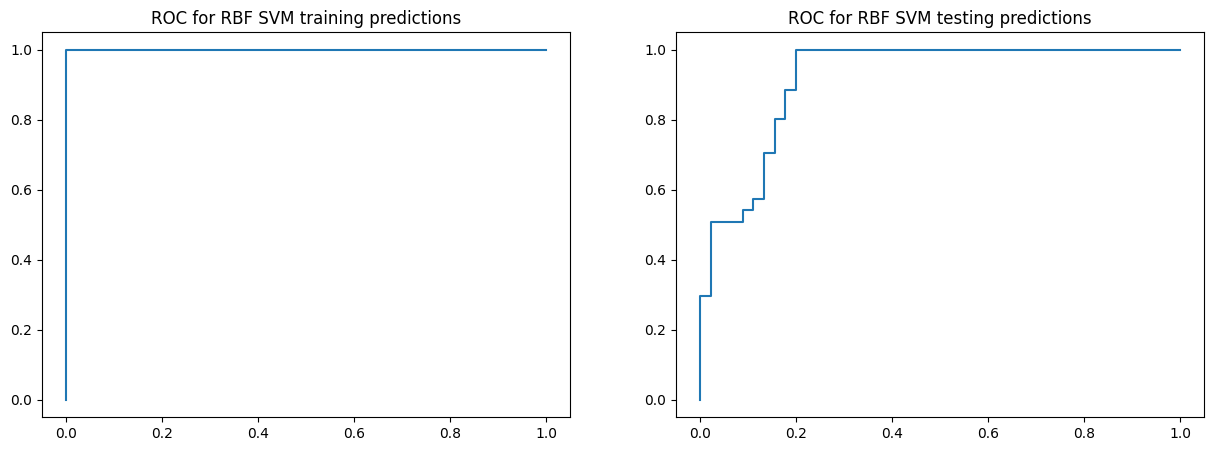

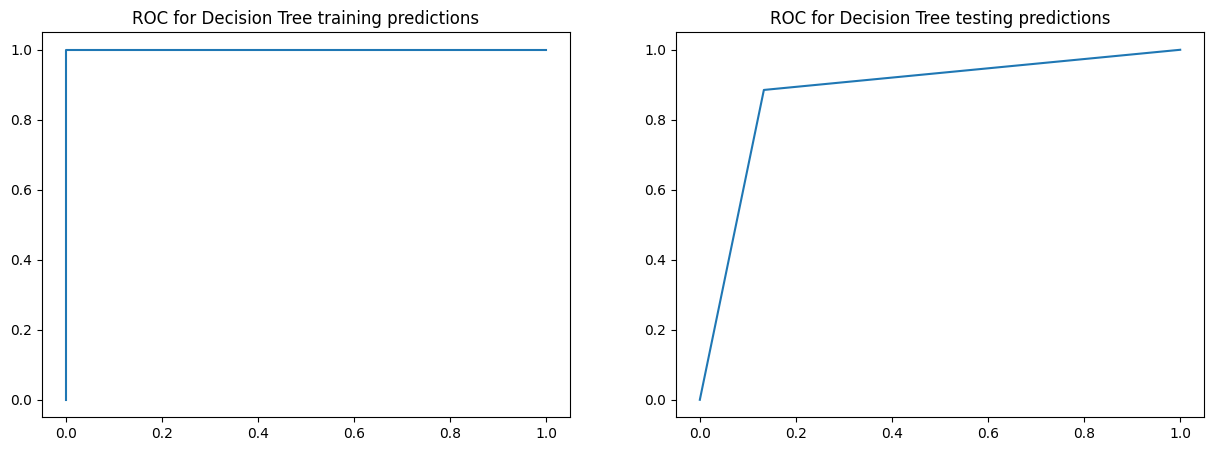

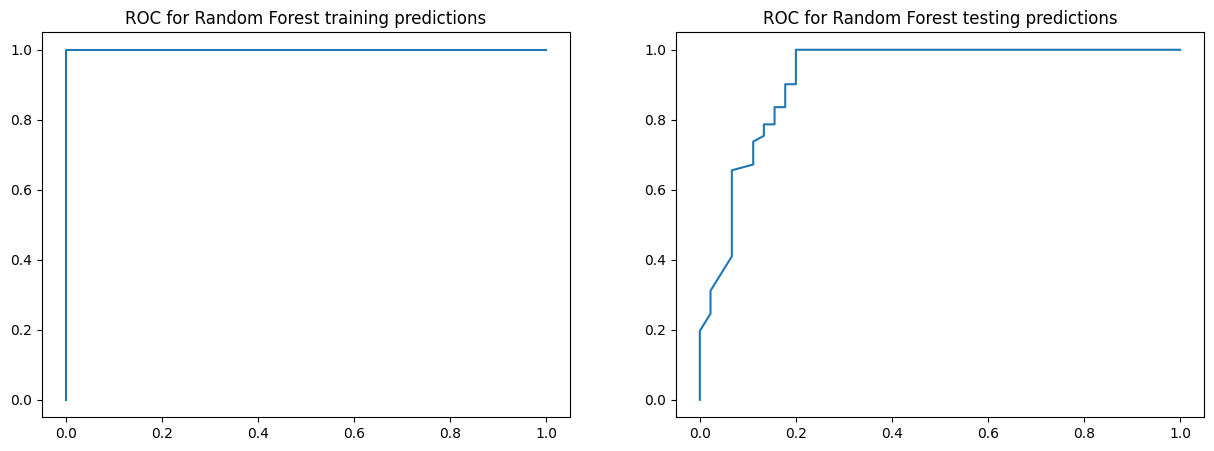

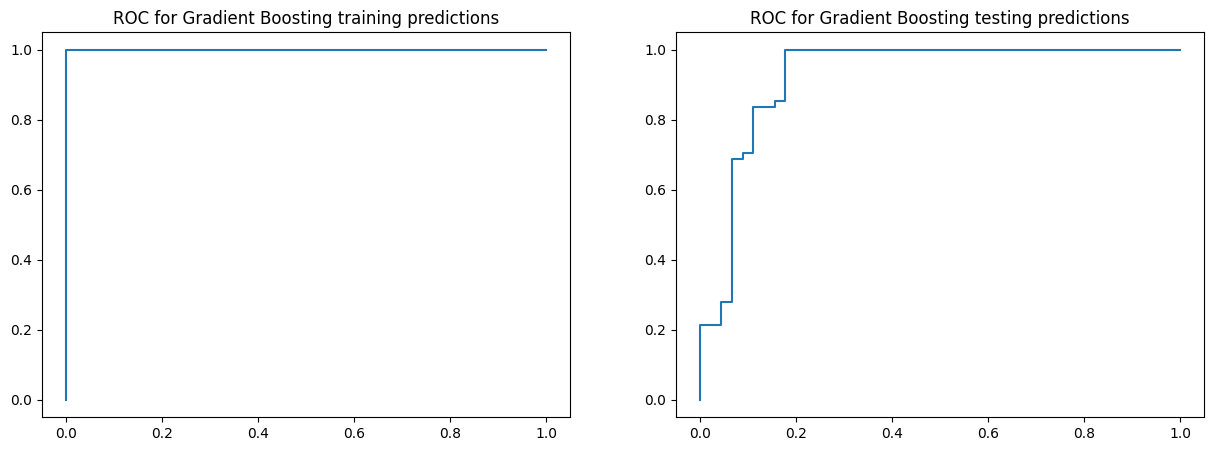

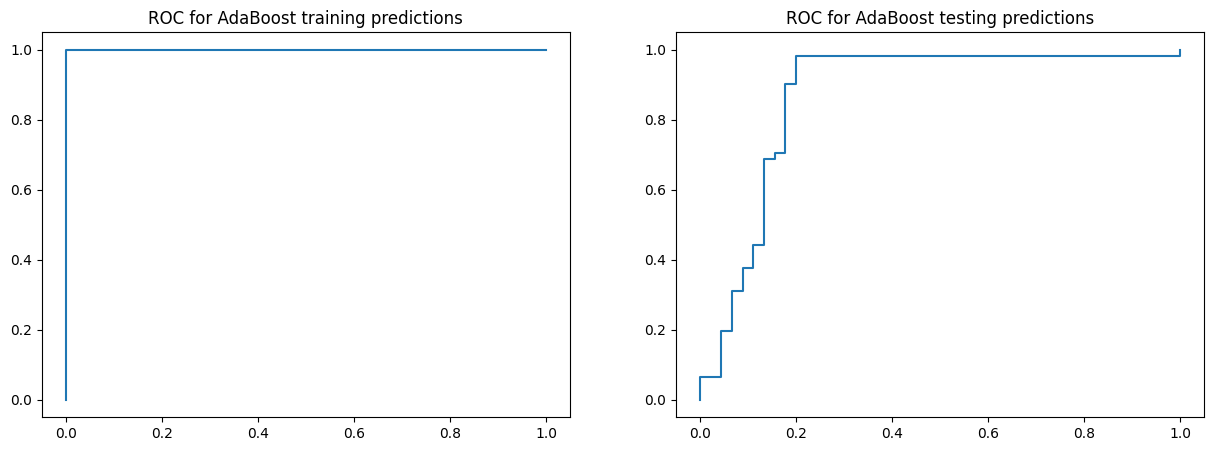

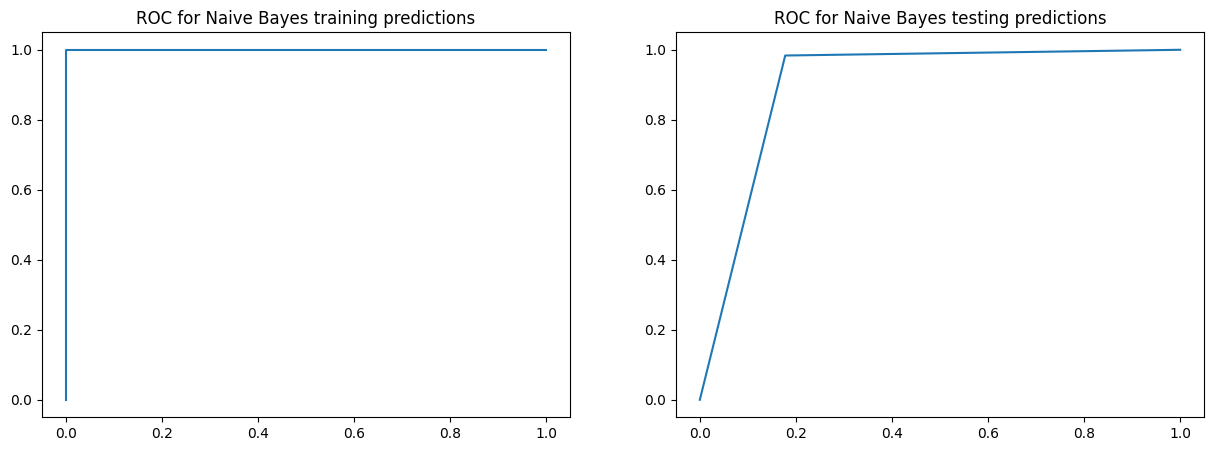

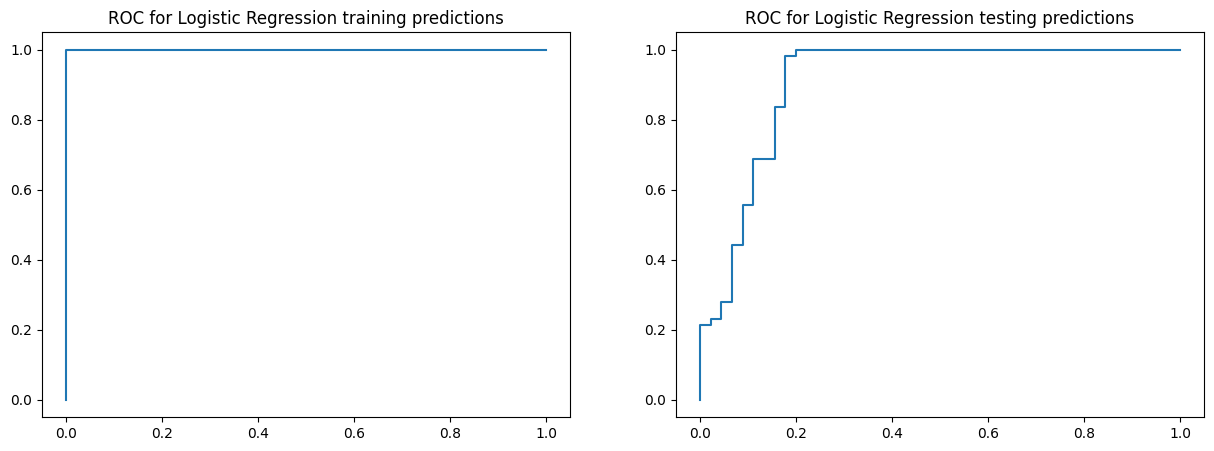

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Init. a dataframe to collect the metrics
df = pd.DataFrame(index=classifiers.keys(), columns=['Accuracy_train', 'Accuracy_test',
                                                     'F1_train', 'F1_test',
                                                     'AUROC_train', 'AUROC_test',
                                                     'AUPRC_train', 'AUPRC_test',
                                                     'MCC_train', 'MCC_test'])

# Loop over the classifier dictionary
for key in classifiers.keys():
    plt.figure(figsize=(15, 5))

    # Create pipeline that standardizes the data and removes constant features before fitting the classifier
    pip = Pipeline([
        ('standardization', StandardScaler()),
        ('feature_selection', VarianceThreshold(threshold=0.0)),
        ('classification', classifiers[key])
    ])

    # Fit the model
    model = pip.fit(x_train, y_train_encoded)

    # Predict the label on the training data
    pred_train = model.predict(x_train)
    pred_prob_train = model.predict_proba(x_train)[:, 1]

    # Training metrics
    acc_score_train = accuracy_score(y_train_encoded, pred_train)
    f1_train = f1_score(y_train_encoded, pred_train)
    auroc_train = roc_auc_score(y_train_encoded, pred_prob_train)
    mcc_train = matthews_corrcoef(y_train_encoded, pred_train)
    precision1, recall1, thresh_prc1 = precision_recall_curve(y_train_encoded, pred_prob_train)
    auprc_train = auc(recall1, precision1)

    # Predict the label on the testing data
    pred_test = model.predict(x_test)
    pred_prob_test = model.predict_proba(x_test)[:, 1]

    # Testing metrics
    acc_score_test = accuracy_score(y_test_encoded, pred_test)
    f1_test = f1_score(y_test_encoded, pred_test)
    auroc_test = roc_auc_score(y_test_encoded, pred_prob_test)
    mcc_test = matthews_corrcoef(y_test_encoded, pred_test)
    precision2, recall2, thresh_prc2 = precision_recall_curve(y_test_encoded, pred_prob_test)
    auprc_test = auc(recall2, precision2)

    # Fill the df
    df.loc[key] = [acc_score_train, acc_score_test,
                   f1_train, f1_test,
                   auroc_train, auroc_test,
                   auprc_train, auprc_test,
                   mcc_train, mcc_test]

    # Display ROC curve for training predictions
    fp1, tp1, thresh1 = roc_curve(y_train_encoded, pred_prob_train)

    plt.subplot(1, 2, 1)
    plt.plot(fp1, tp1)
    plt.title(f"ROC for {key} training predictions")

    # Display ROC curve for testing predictions
    fp2, tp2, thresh2 = roc_curve(y_test_encoded, pred_prob_test)

    plt.subplot(1, 2, 2)
    plt.plot(fp2, tp2)
    plt.title(f"ROC for {key} testing predictions")

# Display the metrics df
df

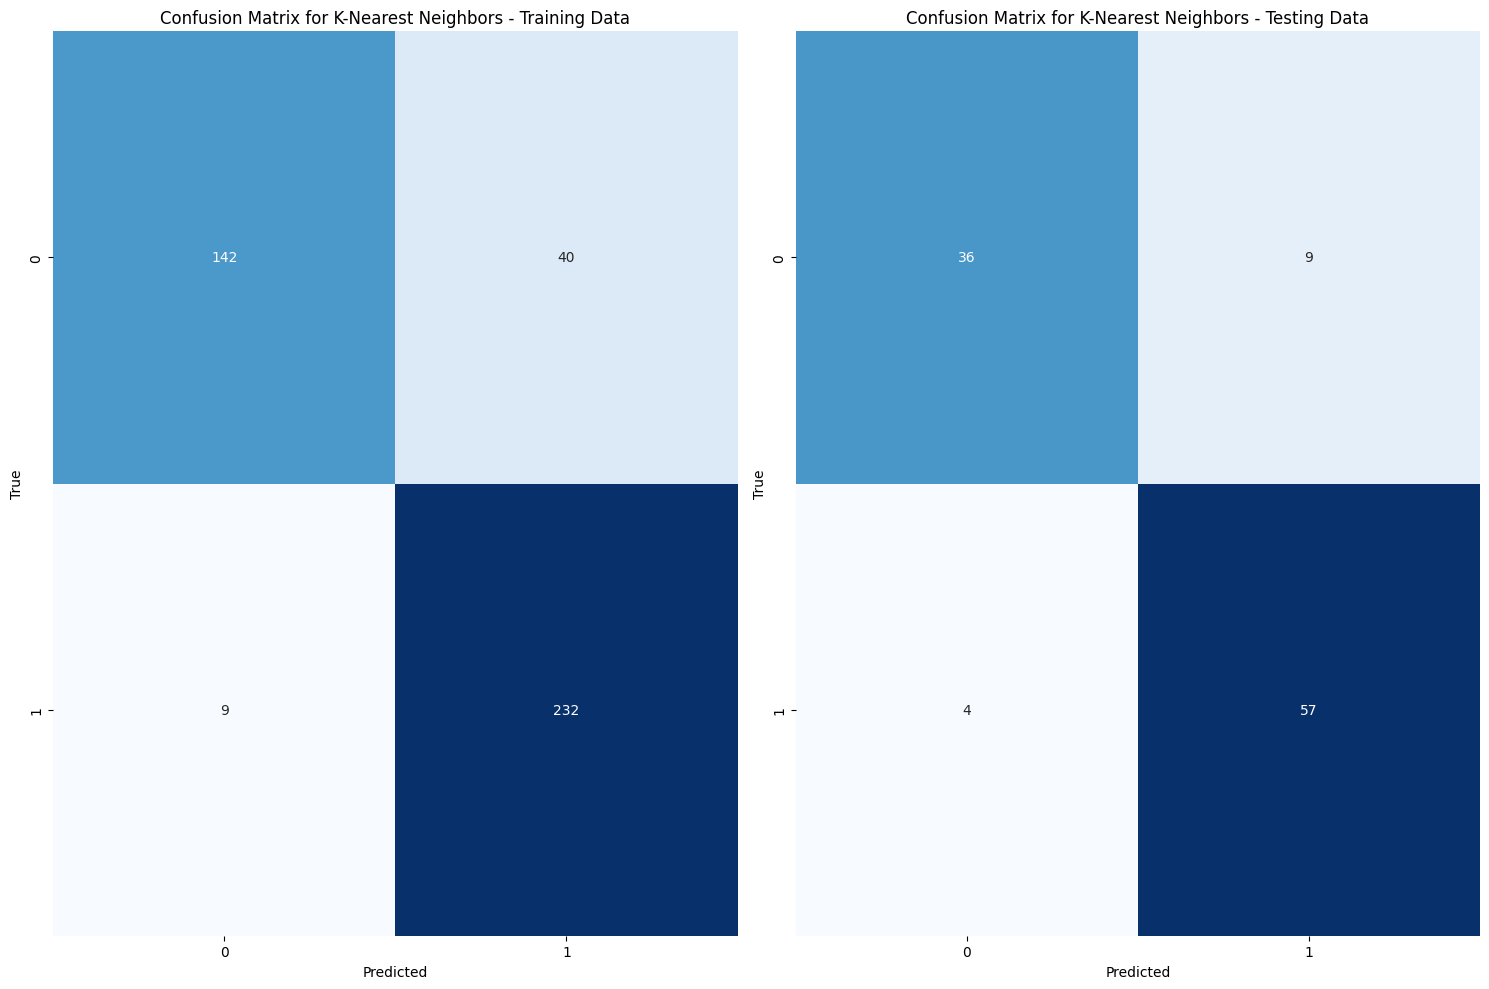

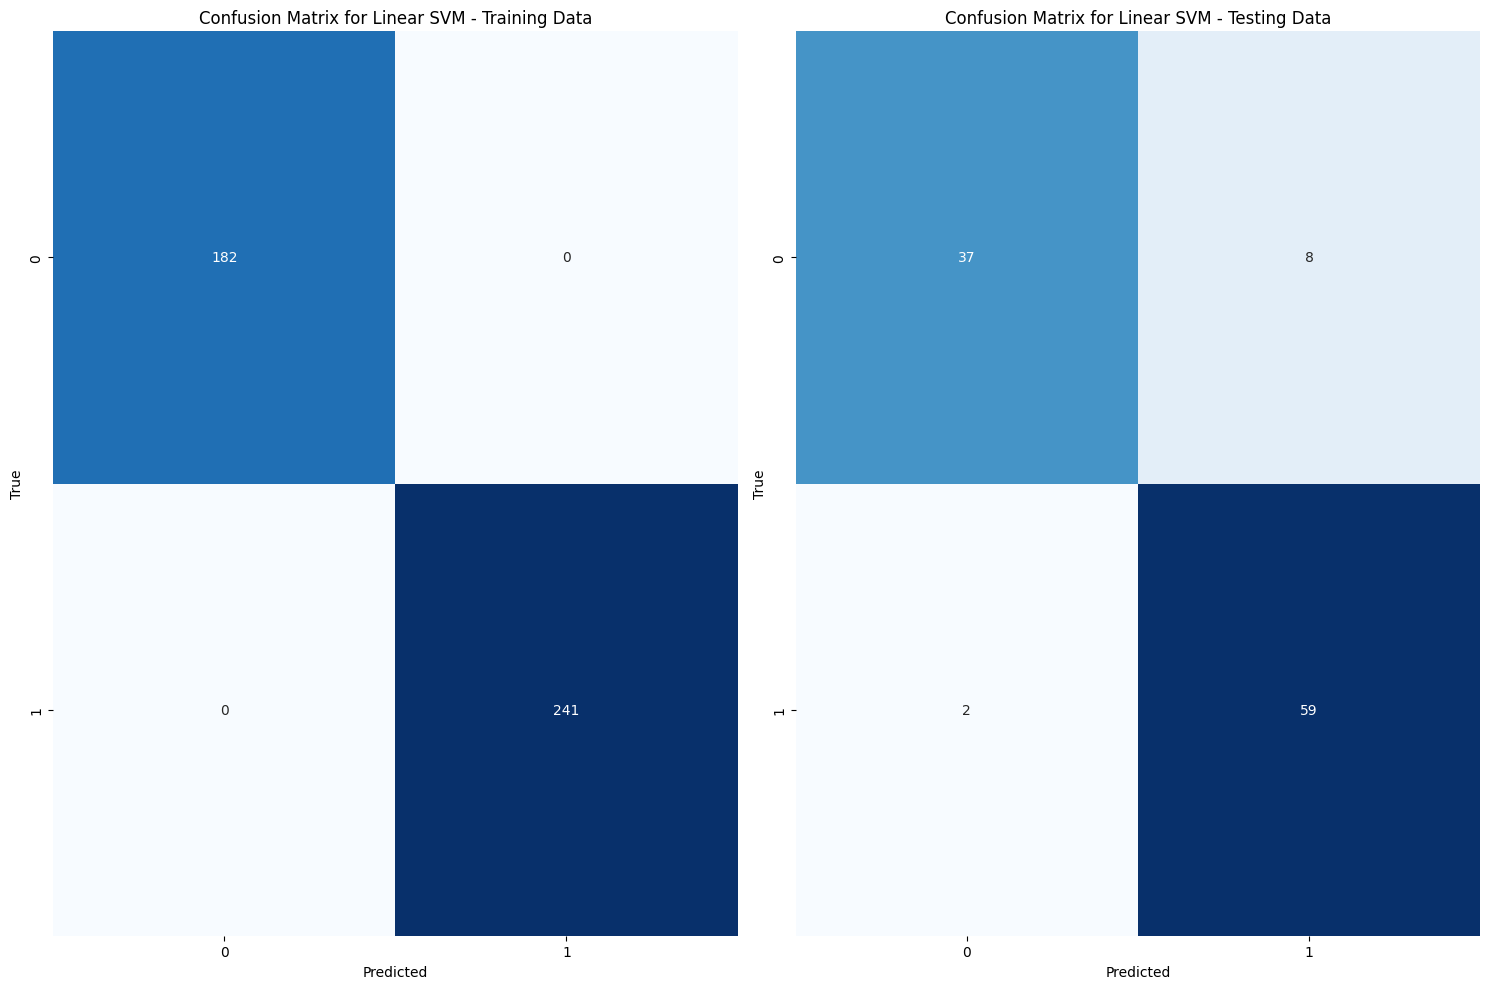

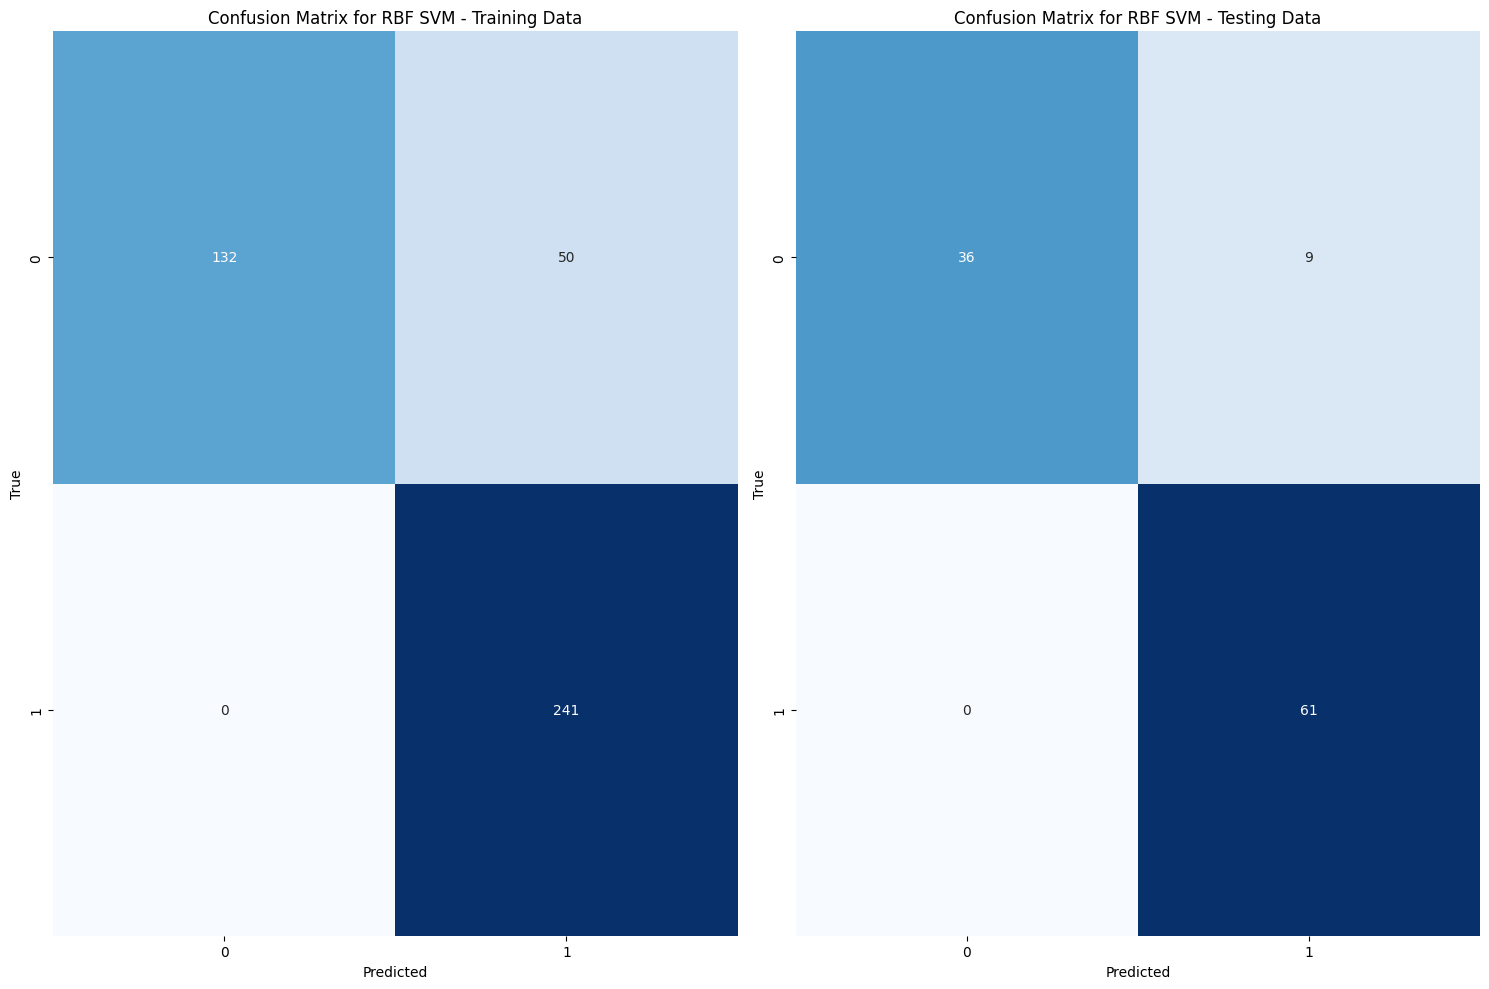

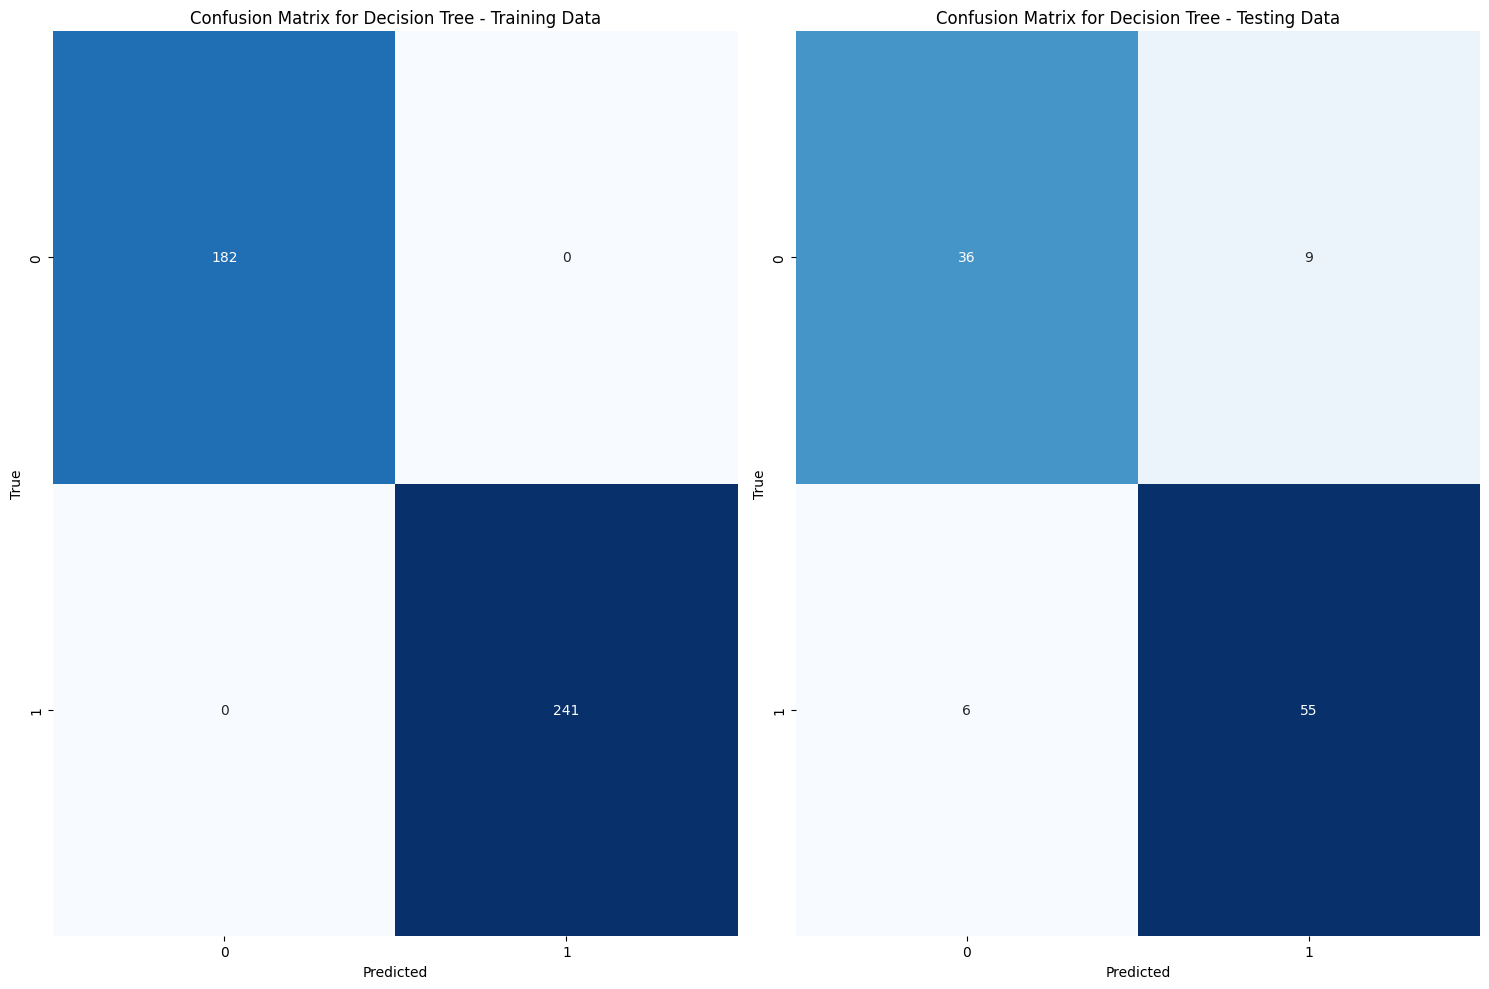

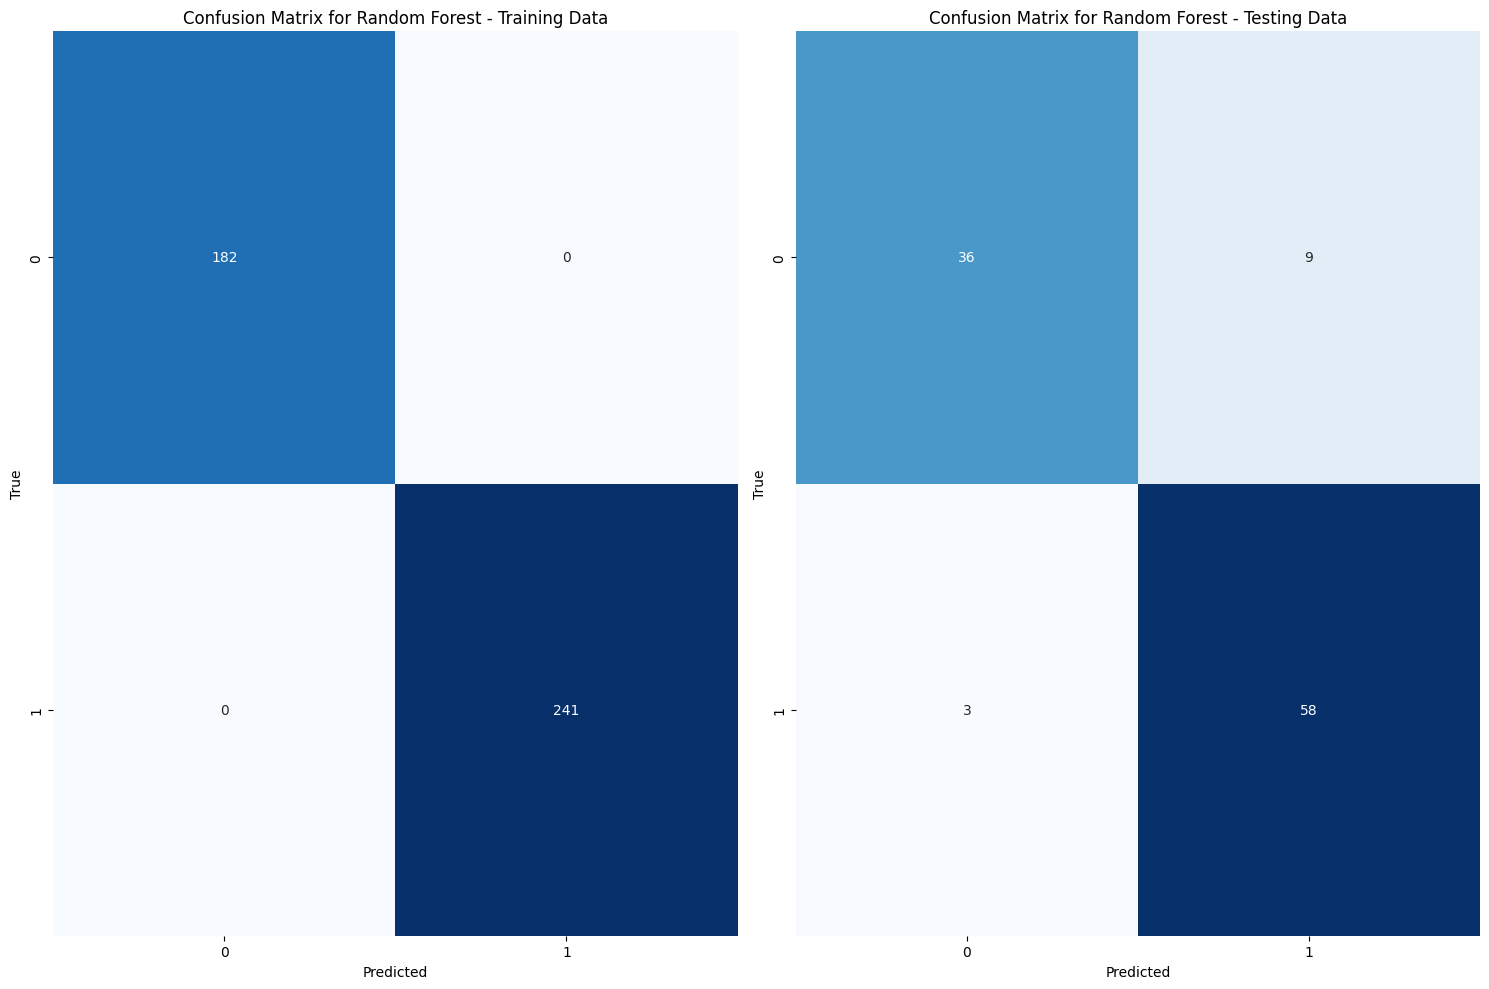

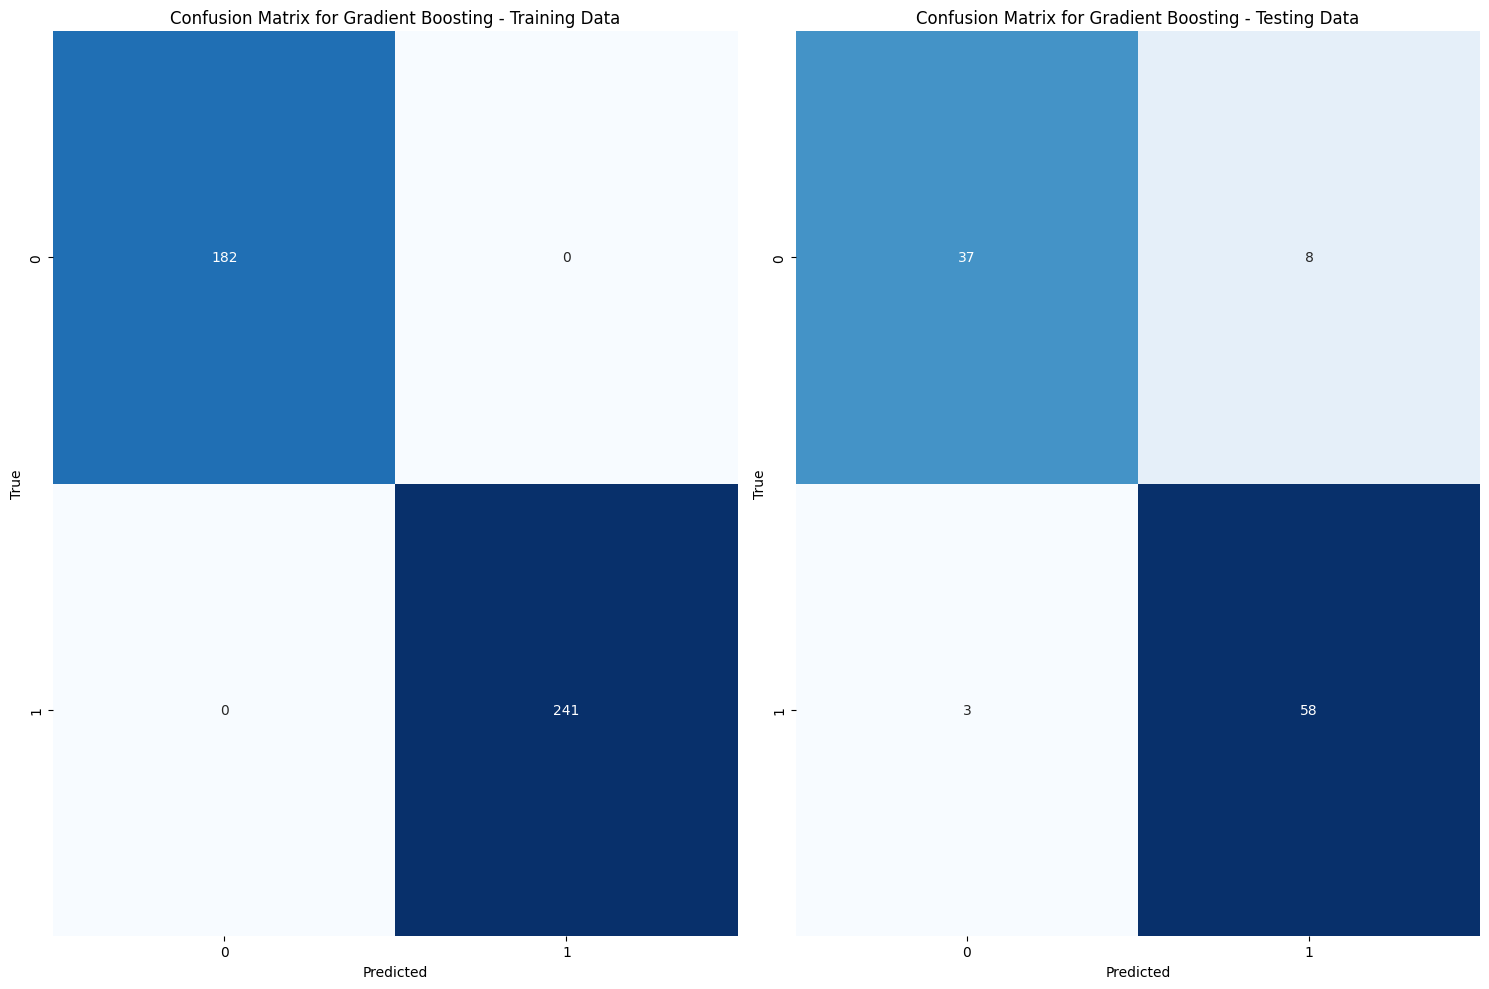

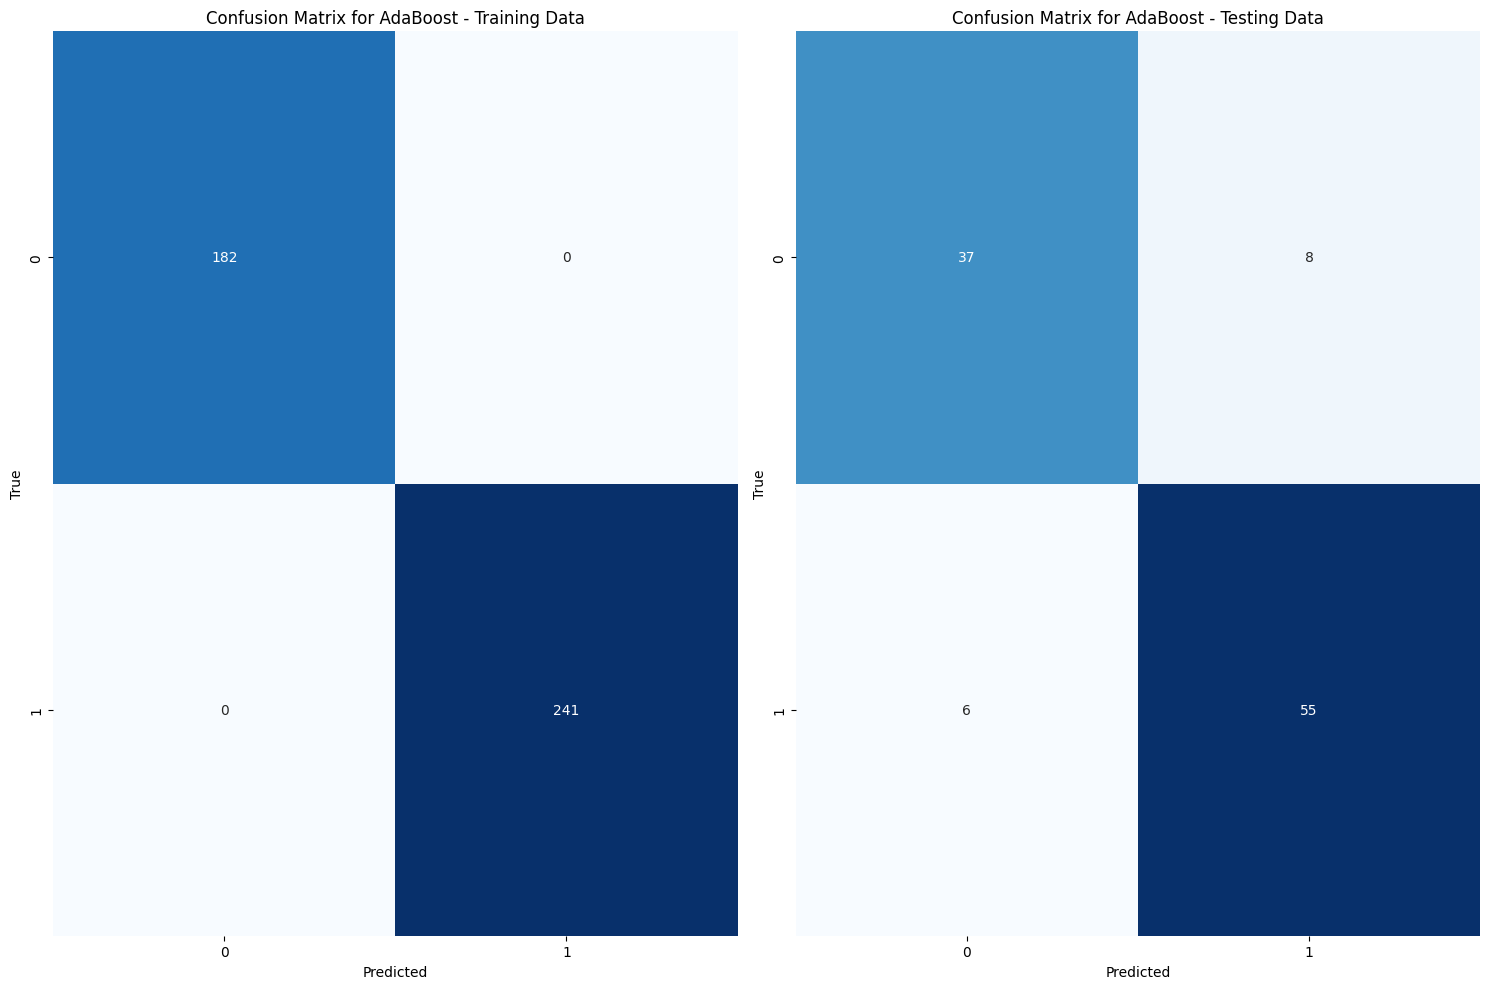

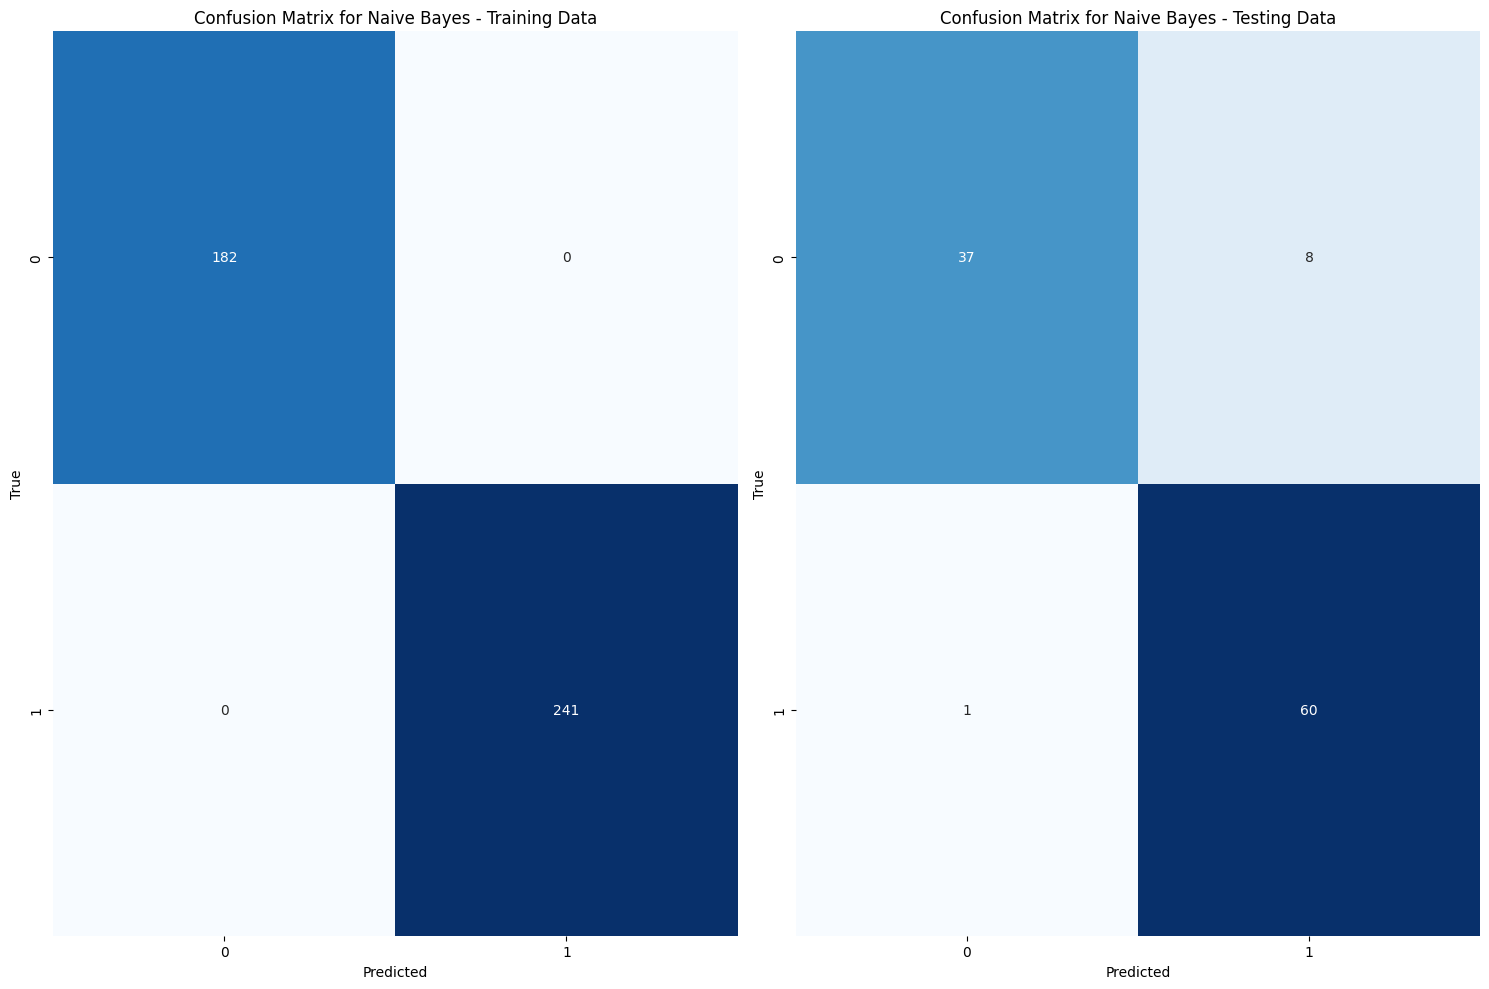

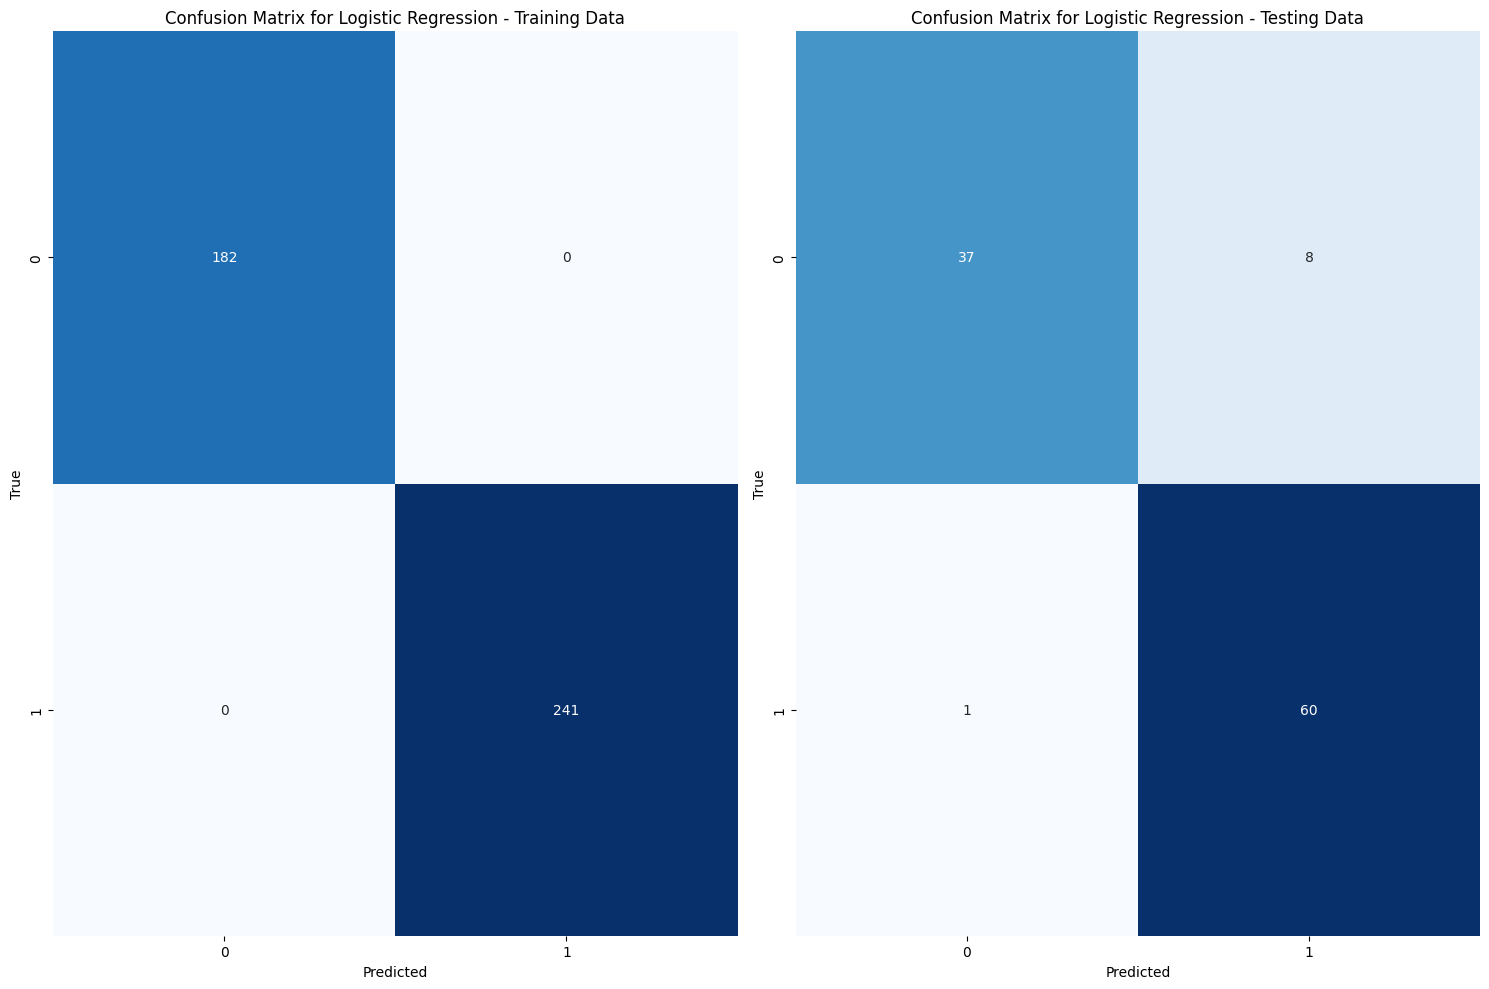

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Loop over the classifier dictionary
for key in classifiers.keys():
    plt.figure(figsize=(15, 10))

    # Create pipeline that standardizes the data and removes constant features before fitting the classifier
    pip = Pipeline([
        ('standardization', StandardScaler()),
        ('feature_selection', VarianceThreshold(threshold=0.0)),
        ('classification', classifiers[key])
    ])

    # Fit the model
    model = pip.fit(x_train, y_train_encoded)

    # Predict the labels for training and testing data
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    # Calculate confusion matrices for training and testing data
    cm_train = confusion_matrix(y_train_encoded, pred_train)
    cm_test = confusion_matrix(y_test_encoded, pred_test)

    # Plot confusion matrix for training data
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {key} - Training Data")
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Plot confusion matrix for testing data
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {key} - Testing Data")
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Show the plots
    plt.tight_layout()
    plt.show()

(529, 50475)
(529,)


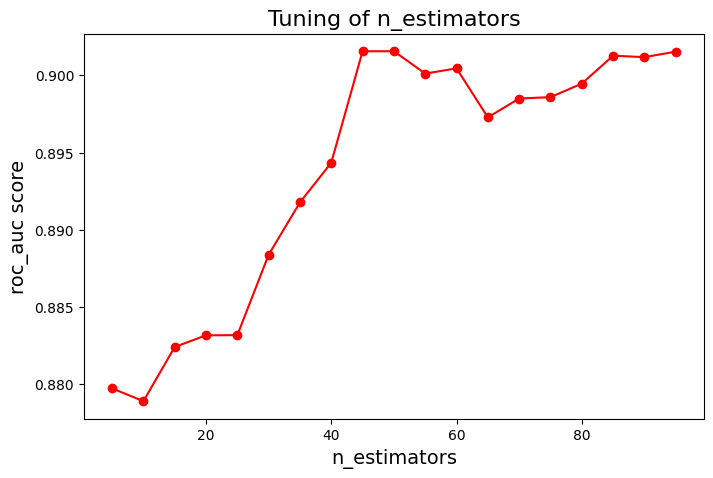

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load or define X and y here, ensuring they have the same number of samples
X =  pd.read_csv("/kaggle/input/depression/normalized_merged_dataset.csv",index_col=0)
y =  pd.read_excel("/kaggle/input/depression/ML_Conditions DIP.xlsx" )

# Extract the target variable from the DataFrame 'y'
y = y['diagnosis'] # Replace 'diagnosis' with the actual column name containing the target variable

# **Transpose X to align with y if needed**
X = X.transpose()  # Transpose X so that rows represent samples and columns represent features

# Check the shapes of X and y to ensure they are compatible
print(X.shape)
print(y.shape)

# If the shapes don't match, investigate why and fix the data loading or preprocessing steps.
# For example, you might need to filter or align the data in X and y to ensure consistency.

# Once X and y have the same number of samples, proceed with the rest of your code:

# tuning how many trees should we consider
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

n_estimators = range(5,100, 5)
scores= []
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators= i, random_state= 0)
    # Use the defined X and y variables here
    scores.append(np.mean(cross_val_score(rf, X, y, scoring='roc_auc', cv= cv)))

plt.figure(figsize=(8,5))
plt.plot(n_estimators, scores, color='red', marker='o')
plt.title('Tuning of n_estimators', fontsize=16)
plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('roc_auc score', fontsize=14)
plt.show()

Text(0, 0.5, 'roc_auc score')

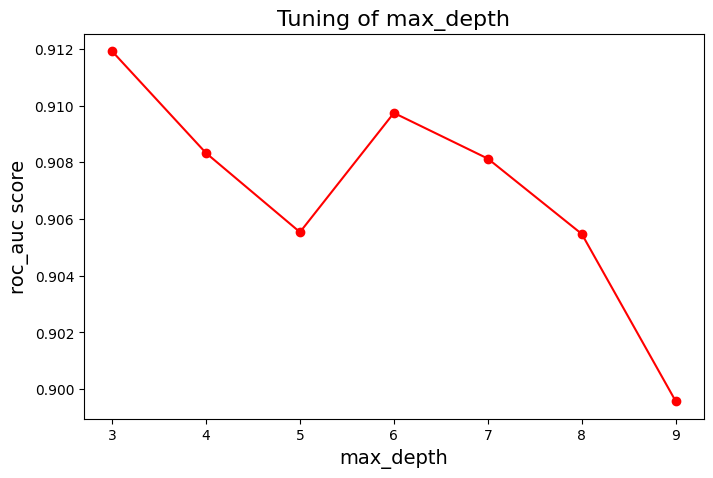

In [28]:
# tuning the max depth of the tree
max_depth = range(3,10)
scores= []
for i in max_depth:
    rf = RandomForestClassifier(max_depth= i, random_state= 0)
    # Use X and y defined in the previous cell
    scores.append(np.mean(cross_val_score(rf, X, y, scoring='roc_auc', cv= cv)))

plt.figure(figsize=(8,5))
plt.plot(max_depth , scores, color='red', marker='o')
plt.title('Tuning of max_depth', fontsize=16)
plt.xlabel('max_depth', fontsize=14)
plt.ylabel('roc_auc score', fontsize=14)

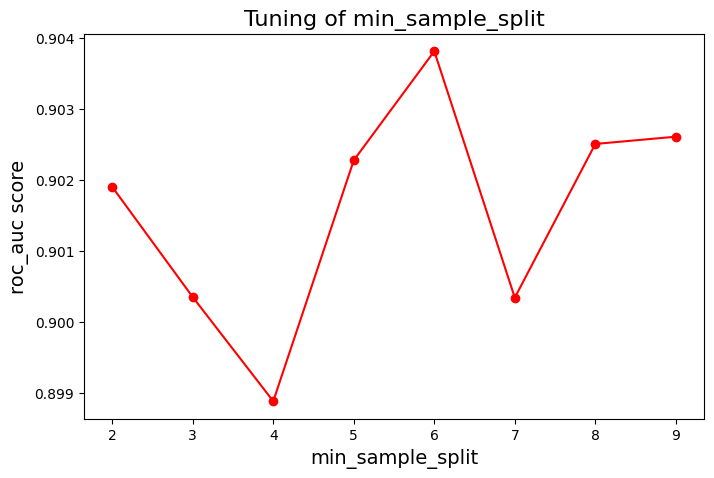

In [29]:
# tuning min_sample_split
min_sample_split = range(2,10)
scores= []
for i in min_sample_split:
    rf = RandomForestClassifier(min_samples_split= i, random_state= 0)
    scores.append(np.mean(cross_val_score(rf, X, y, scoring='roc_auc', cv= cv)))

plt.figure(figsize=(8,5))
plt.plot(min_sample_split, scores, color='red', marker='o')
plt.title('Tuning of min_sample_split', fontsize=16)
plt.xlabel('min_sample_split', fontsize=14)
plt.ylabel('roc_auc score', fontsize=14)
plt.show()

In [ ]:
# Grid Search
params= {'n_estimators':[20,50,100],
       'max_depth': [3,4,7],
       'min_samples_split': [2,4,6]
       }

gridsearch=GridSearchCV(RandomForestClassifier(), params, cv=10, scoring='roc_auc')
gridsearch.fit(X, y)

print(f"Best parameters for Random Forest Classifier: {gridsearch.best_params_}")
print(f"Best Score for the selected parameters: {gridsearch.best_score_}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Scaling: StandardScaler is used to scale the features to have mean 0 and variance 1.
#Pipeline: A pipeline is used to chain the scaling and logistic regression steps together.
#Increased max_iter: The number of iterations is increased to 5000 to give the solver more time to converge.
# Define the pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000))  # Increase max_iter to 5000
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

c_values = [0.1, 0.2, 0.5, 1]
scores = []
for i in c_values:
    pipeline.set_params(logreg__C=i)  # Set C value in the pipeline
    scores.append(np.mean(cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv)))

plt.figure(figsize=(8, 5))
plt.plot(c_values, scores, color='red', marker='o')
plt.title('Tuning of C Values', fontsize=16)
plt.xlabel('C Values', fontsize=14)
plt.ylabel('ROC AUC Score', fontsize=14)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#Pipeline: The Pipeline object is used to chain together the scaling (StandardScaler) and logistic regression (LogisticRegression). This ensures that scaling is applied within each fold during the cross-validation in GridSearchCV.
#Increased max_iter: The max_iter parameter is increased to 5000 to give the solver more time to converge.
#Parameter Grid: The parameter grid params is updated to reflect the parameters of the logistic regression model within the pipeline (logreg__C).

# Define a pipeline that scales the data and then applies logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000))  # Increase max_iter to 5000
])

# Define the parameter grid
params = {'logreg__C': [0.1, 0.2]}

# Perform grid search
gridsearch = GridSearchCV(pipeline, params, cv=10, scoring='roc_auc')
gridsearch.fit(X, y)

# Output the best parameters and best score
print(f"Best parameters for Logistic Regression Classifier: {gridsearch.best_params_}")
print(f"Best Score for the selected parameters: {gridsearch.best_score_}")

In [ ]:
#Validation
#define a function for model validation using cross validation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc, matthews_corrcoef, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

def model_validation(x, y, cls, cls_name, n_splits, times, best_params=None, best_score=None):
    # Init lists to store cross-validation results
    cv_acc = []
    cv_f1 = []
    cv_AUC = []
    cv_AUPRC = []
    cv_MCC = []

    plt.figure(figsize=(8, 5))

    for i in range(times):
        # Cross-validation using n splits
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i)

        # Iterate over folds and split the data into train and test
        for train_idx, test_idx in cv.split(x, y):
            # Create subsets of data and labels based on splits
            x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Convert string labels to numeric
            y_train_numeric = np.where(y_train == 'MDD', 1, 0)
            y_test_numeric = np.where(y_test == 'MDD', 1, 0)

            # Fit the classifier
            model = cls.fit(x_train, y_train_numeric)

            # Predict the labels and probability predictions
            pred = model.predict(x_test)
            pred_prob = model.predict_proba(x_test)[:, 1]

            # Calculate quality metrics
            cv_acc.append(accuracy_score(y_test_numeric, pred))
            cv_f1.append(f1_score(y_test_numeric, pred))
            cv_MCC.append(matthews_corrcoef(y_test_numeric, pred))
            cv_AUC.append(roc_auc_score(y_test_numeric, pred_prob))

            # Need precision & recall values for all thresholds to calculate AUPRC
            precision, recall, _ = precision_recall_curve(y_test_numeric, pred_prob)
            cv_AUPRC.append(auc(recall, precision))

            # Display ROC curves
            fpr, tpr, _ = roc_curve(y_test_numeric, pred_prob)
            plt.plot(fpr, tpr)
            plt.title(f"ROC Curve for {cls_name}")

    # This is to plot the mean AUC value in the legend
    plt.plot(0, 0, markersize=0, label="Mean AUC=" + str(round(np.mean(cv_AUC), 4)), lw=0)
    plt.legend()

    # Print the best parameters and score if provided
    if best_params and best_score:
        print(f"Best parameters for {cls_name}: {best_params}")
        print(f"Best score for the selected parameters: {round(best_score, 6)}")

    print(f"Quality metrics for {cls_name}: ")
    print('-------------------------------------------------------------------------------------------')
    print('CV  = Mean(Acc): ', round(np.mean(cv_acc), 6), ', Var(Acc): ', round(np.var(cv_acc), 6))
    print('CV  = Mean(F1): ', round(np.mean(cv_f1), 6), ', Var(F1): ', round(np.var(cv_f1), 6))
    print('CV  = Mean(AUC): ', round(np.mean(cv_AUC), 6), ', Var(AUC): ', round(np.var(cv_AUC), 6))
    print('CV  = Mean(AUPRC): ', round(np.mean(cv_AUPRC), 6), ', Var(AUPRC): ', round(np.var(cv_AUPRC), 6))
    print('CV  = Mean(MCC): ', round(np.mean(cv_MCC), 6), ', Var(MCC): ', round(np.var(cv_MCC), 6))
    print('-------------------------------------------------------------------------------------------')

# Example usage:

# Assuming you have performed a grid search and obtained the best parameters and score
best_params = {'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 20}
best_score = 0.8311398699477242

# Create a RandomForestClassifier with the best parameters
from sklearn.ensemble import RandomForestClassifier
best_rf = RandomForestClassifier(**best_params)

# Call the model_validation function
model_validation(X, y, best_rf, "Random Forest Classifier", n_splits=10, times=5, best_params=best_params, best_score=best_score)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression

# Define the pipeline for Logistic Regression
logistic_pipeline = Pipeline([
    ('standardization', StandardScaler()),
    ('feature_selection', VarianceThreshold(threshold=0.0)),
    ('classification', LogisticRegression(C=0.2, max_iter=5000, random_state=0))
])
# Best parameters and score from a previous grid search or tuning process
best_params_logistic = {'C': 0.2, 'max_iter': 5000}
best_score_logistic = 0.8311398699477242

# Validate the Logistic Regression using the predefined function and the pipeline
model_validation(X, y, logistic_pipeline, 'Logistic Regression', n_splits=10, times=5 ,best_params=best_params, best_score=best_score)

In [ ]:
# train the random forest classifier
finalmodel= RandomForestClassifier(max_depth= 4, min_samples_split= 6, n_estimators= 20, random_state=0)
finalmodel= finalmodel.fit(X,y)

In [ ]:
#Feature Importance of Random ForesT
importances = finalmodel.feature_importances_
forest_importances = pd.Series(importances, index= X.columns)

plt.figure(figsize= (8,6))
forest_importances.nlargest(10).plot.bar()
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.tight_layout()

In [ ]:
# visualize first decision tree of the forest
plt.figure(figsize=(20,15))
first_tree= tree.plot_tree(finalmodel.estimators_[0], feature_names= X.columns, filled=True)


In [ ]:
# load test data
testdata=  pd.read_csv("/kaggle/input/depression/normalized_merged_dataset.csv",index_col=0)
# load test labels
testlabels=pd.read_excel("/kaggle/input/depression/ML_Conditions DIP.xlsx" )

x_test= testdata.iloc[:,1:]
y_test= testlabels.iloc[:,1]

# create dummy x_test
Xdummies=pd.get_dummies(x,drop_first=True)
features=Xdummies.columns

x_test=pd.get_dummies(x_test,drop_first=True)
test_feat=x_test.columns

exclude=list(set(test_feat)-set(features))
include=list(set(features)-set(test_feat))
x_test=pd.concat([x_test.drop(exclude,axis=1).reset_index(drop=True), pd.DataFrame(index=range(0,x_test.shape[0]),data=0,columns=include).reset_index(drop=True)],axis=1)

# apply the model
finaltest_pred= finalmodel.predict(x_test)
finaltest_prob= finalmodel.predict_proba(y_test, finaltest_pred)